## Objective:

Figure out a smart data driven way to split the data up into magnitude bins that captures information without having a human explicitly pick bins.

## Ideas:

Try logistic fits to probabilities. By the time they drop all the way down to low levels, magnitude cuts will most likely have cut off all of these objects anyways. Use logistic parameters to define bins. Use bin limits from all three probabilities, maybe some sort of smallest bin size to combine some if they are very close.

In [1]:
import numpy as np
import fitsio
import IsochroneConfig as isoConfig
import matplotlib.pyplot as plt

Reading fracdet map /hdfs/bechtol/balrog/y3/y3a2_survey_conditions_maps/fracdet/y3a2_griz_o.4096_t.32768_coverfoot_EQU.fits.gz ...
NSIDE = 4096
ORDERING = NESTED in fits file
INDXSCHM = EXPLICIT
Ordering converted to RING


In [2]:
galaFile = isoConfig.galaFile
matStarFile = isoConfig.matStarFile
detStarFile = isoConfig.detStarFile

In [3]:
classCutoff = isoConfig.classCutoff
sigma = isoConfig.sigma
numBins = isoConfig.numBins

In [4]:
galaData = fitsio.read(galaFile)
matStarData = fitsio.read(matStarFile)
detStarData = fitsio.read(detStarFile)

In [5]:
detStarRMAG = detStarData['RMAG']
detStarCLASS = detStarData['DETECTED']

In [6]:
matStarRMAG = matStarData['RMAG']
matStarCLASS = np.ones_like(matStarData['CLASS'])
matStarCLASS[np.where(matStarData['CLASS'] > classCutoff)[0]] = 0 

In [7]:
galaRMAG = galaData['RMAG']
galaCLASS = np.ones_like(galaData['CLASS'])
galaCLASS[np.where(galaData['CLASS'] < classCutoff)[0]] = 0

In [8]:
xGala = np.linspace(np.average(galaRMAG)-3*np.std(galaRMAG), np.average(galaRMAG)+3*np.std(galaRMAG), numBins)
xGala = xGala[np.where(xGala <= 24.5)[0]]
x = np.linspace(18, 24.5, 100)
galaSigma = sigma * np.std(galaRMAG)
yGala = []

for xi in x:
    # Gaussian weighting the values close by to each x value.
    totCor = np.sum(galaCLASS * np.exp(-1*(((galaRMAG - xi) / galaSigma)**2)))
    totAll = np.sum(np.exp(-1*(((galaRMAG - xi) / galaSigma)**2)))
    yGala.append(totCor / totAll)

yGala = np.array(yGala)

In [9]:
xMatStar = np.linspace(np.average(matStarRMAG)-3*np.std(matStarRMAG), np.average(matStarRMAG)+3*np.std(matStarRMAG), numBins)
xMatStar = xMatStar[np.where(xMatStar <= 24.5)[0]]
matStarSigma = sigma * np.std(matStarRMAG)
yMatStar = []

for xi in x:
    # Gaussian weighting the values close by to each x value.
    totCor = np.sum(matStarCLASS * np.exp(-1*(((matStarRMAG - xi) / matStarSigma)**2)))
    totAll = np.sum(np.exp(-1*(((matStarRMAG - xi) / matStarSigma)**2)))
    yMatStar.append(totCor / totAll)

yMatStar = np.array(yMatStar)

In [10]:
xDetStar = np.linspace(np.average(detStarRMAG)-3*np.std(detStarRMAG), np.average(detStarRMAG)+3*np.std(detStarRMAG), numBins)
xDetStar = xDetStar[np.where(xDetStar <= 24.5)[0]]
detStarSigma = sigma * np.std(detStarRMAG)
yDetStar = []

for xi in x:
    # Gaussian weighting the values close by to each x value.
    totCor = np.sum(detStarCLASS * np.exp(-1*(((detStarRMAG - xi) / detStarSigma)**2)))
    totAll = np.sum(np.exp(-1*(((detStarRMAG - xi) / detStarSigma)**2)))
    yDetStar.append(totCor / totAll)

yDetStar = np.array(yDetStar)

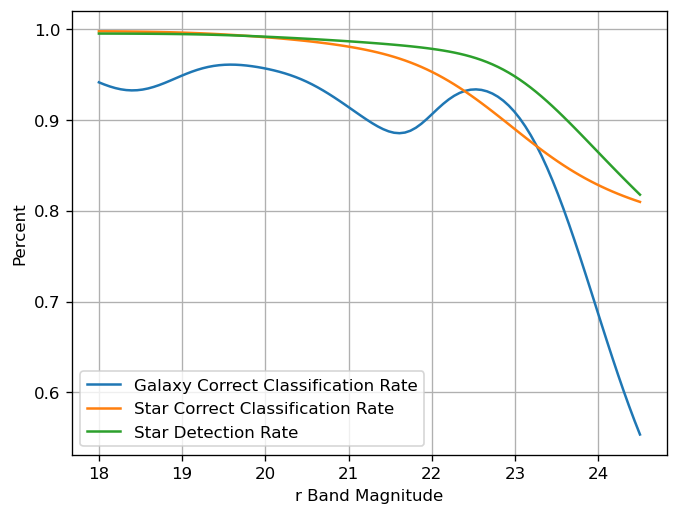

In [11]:
plt.figure(dpi = 120)
plt.plot(x, yGala, zorder = 3, label = 'Galaxy Correct Classification Rate')
plt.plot(x, yMatStar, zorder = 3, label = 'Star Correct Classification Rate')
plt.plot(x, yDetStar, zorder = 3, label = 'Star Detection Rate')
plt.xlabel('r Band Magnitude')
plt.ylabel('Percent')
plt.legend()
plt.grid(zorder = 0)
# plt.ylim([0, 1])
plt.show()

In [12]:
print(np.min(yGala))
print(np.min(yMatStar))
print(np.min(yDetStar))

0.5538108759259655
0.8095730961718495
0.8175166680101873


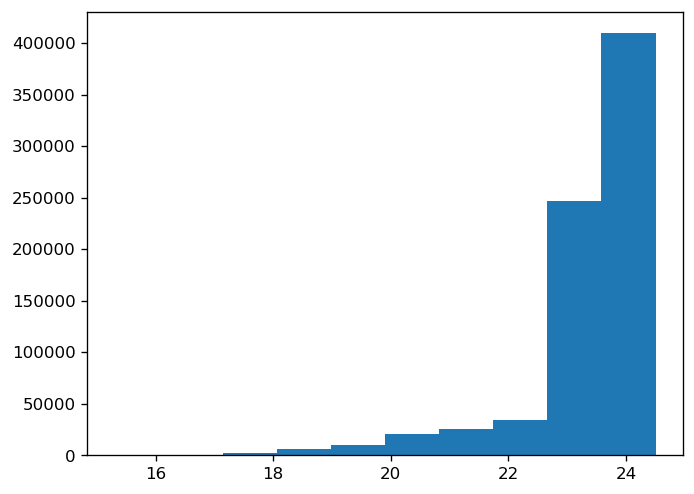

In [13]:
plt.figure(dpi = 120)
plt.hist(galaRMAG)
plt.show()